# Delhi Air Quality Data Visualization Project

### Introduction
Air pollution is one of the most pressing environmental and public health challenges in India, with Delhi frequently ranking among the most polluted cities in the world. PM2.5 (particles smaller than 2.5 micrometers) and PM10 (particles smaller than 10 micrometers) are key indicators of air quality, as they can penetrate deep into the respiratory system and cause serious health issues.

In this project, I analyze Delhi’s air quality data to:
- Clean and preprocess real-world, messy environmental data
- Visualize patterns and seasonal trends using Python’s data analysis libraries
- Identify correlations between PM2.5 and PM10 levels
- Draw insights about pollution patterns and potential contributing factors

The dataset used for this analysis was sourced from [here](https://www.kaggle.com/datasets/kunshbhatia/delhi-air-quality-dataset). All code and analysis were performed in Python using Pandas, Matplotlib, and Seaborn.  

The goal is to demonstrate basic data cleaning, and exploratory data analysis (EDA), to provide insights into Delhi’s air quality trends.

---
**Date:** 10th August 2025

### Importing libraries and cleaning data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("delhi_air_quality.csv")  
df.head() # first five entries

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [3]:
df.info() # data types and non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [4]:
df.describe() # statistical summary

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [5]:
# delete duplicates
df = df.drop_duplicates()

### Exploratory Data Analysis (EDA)
#### PM2.5

Text(0.5, 1.0, 'PM2.5 distribution in Delhi')

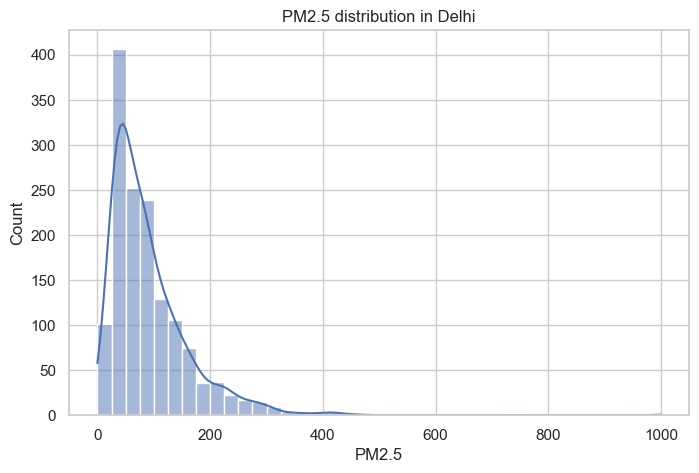

In [6]:
# Distribution of PM2.5
plt.figure(figsize=(8,5))
sns.histplot(df['PM2.5'], bins=40, kde=True)
plt.title("PM2.5 distribution in Delhi")

Text(0.5, 1.0, 'Monthly average of PM2.5')

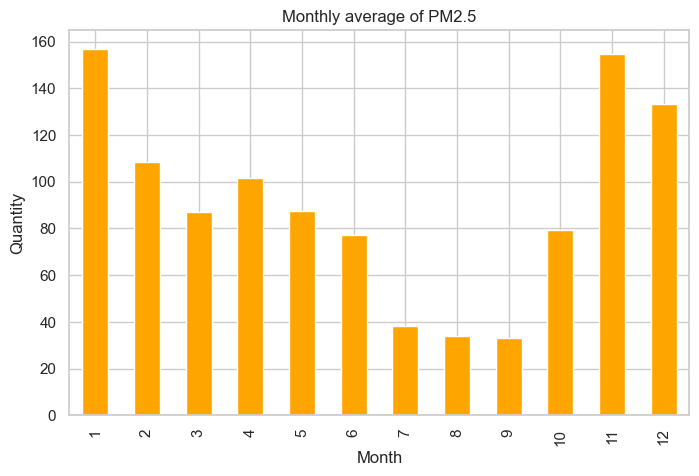

In [7]:
# Monthly average of PM2.5

monthly_average = df.groupby('Month')['PM2.5'].mean()

plt.figure(figsize=(8,5))
monthly_average.plot(kind='bar', color='orange')
plt.ylabel("Quantity")
plt.title('Monthly average of PM2.5')

#### PM10

Text(0.5, 1.0, 'PM10 distribution in Delhi')

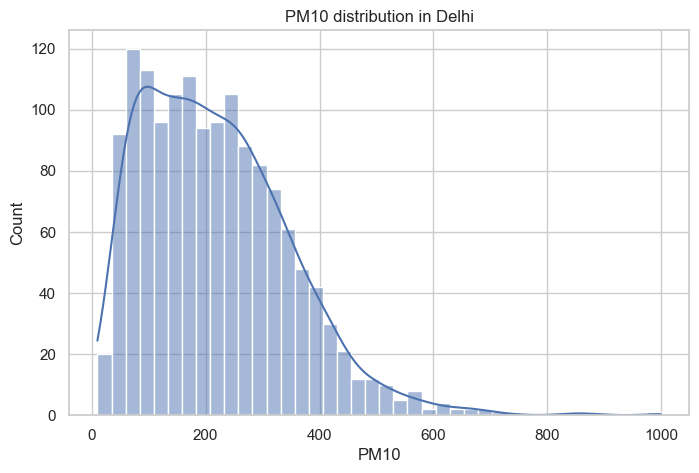

In [8]:
# Distribution of PM10

plt.figure(figsize=(8,5))
sns.histplot(df['PM10'], bins=40, kde=True)
plt.title("PM10 distribution in Delhi")

Text(0, 0.5, 'Quantity')

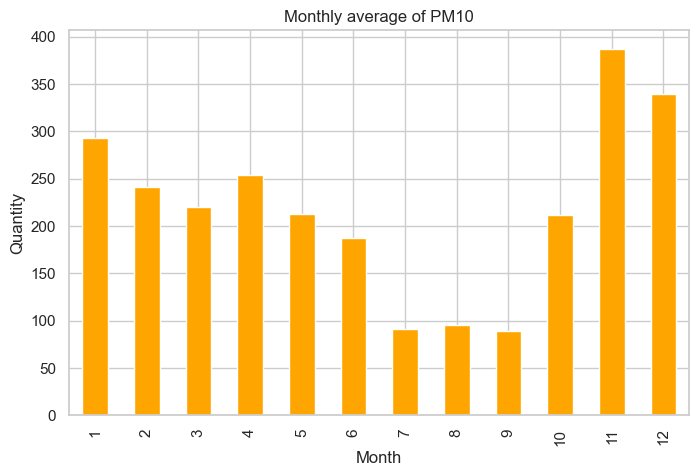

In [9]:
# Monthly average of PM10

pm10 = df.groupby('Month')['PM10'].mean()

plt.figure(figsize=(8,5))
pm10.plot(kind='bar', color='orange')
plt.title('Monthly average of PM10')
plt.ylabel('Quantity')

#### Correlation between PM2.5 and PM10

Text(0.5, 1.0, 'Correlation between PM2.5 and PM10')

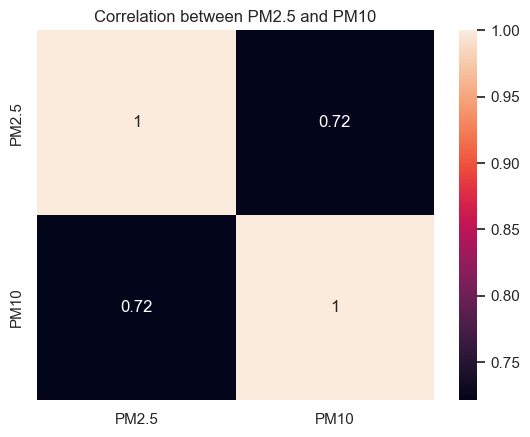

In [10]:
corr = df[['PM2.5', 'PM10']].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation between PM2.5 and PM10")

### Insights

#### Trends
- Air pollution is highest in Winter Months (Nov-Jan), likely due to low wind speeds and stubble burning in nearby states.
- Air pollution decreases sharply in Monsoon, between the months of June - September because rain clears particulates from the air.
#### Correlation
- PM2.5 and PM10 have a strong positive correlation (0.72), meaning they usually rise and fall together, indicating shared sources of pollution.
#### Health Implications
- PM2.5 frequently exceeds WHO safe limits by more than 5× in peak months.
- Winter readings often cross “Severe” category (AQI > 400), posing serious health risks.
#### Outliers
- Certain days show extremely high PM levels could be due to Diwali fireworks, dust storms, or localized fires.

### Conclusion

- Air quality in Delhi shows clear seasonal patterns influenced by weather and human activity.
- Controlling pollution will require targeted action in winter months and during known high-pollution events (e.g., Diwali).
- PM2.5 is more dangerous for health than PM10 because of its small size. Public health warnings should focus on this metric.
- Further analysis could include wind speed, humidity, and temperature data to build predictive models.